<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px"\>

# Visualization in Matplotlib and Pandas

_Authors: Ritika Bhasker (DC), Matt Speck (DC)_

## Learning Objectives:
*This notebook will serve as a reference for:*

* Understanding the importance of using visualizations
* Identifing appropriate plots for different situations.
* Creating bar charts, line charts, histograms, scatterplots, and more using matplotlib


# Opening: Visualizations / Review of YSFB

Why are visualizations important?

[Anscombe's Quartet](https://blog.heapanalytics.com/anscombes-quartet-and-why-summary-statistics-dont-tell-the-whole-story/)

Think back to Joseph Nelson's You Should ____ Blog lecture. What should we consider when making visualizations?

Vizualizations gone wrong: http://viz.wtf/

# Intro to Matplotlib

Matplotlib is a well-known and comprehensive visualization library in Python. It allows virtually complete customizability for creating beautiful, elegant visualizations. 

# Demo: Building a Histogram

In [5]:
import pandas as pd
import matplotlib as plt
plt.get_configdir()

'/Users/admin/.matplotlib'

In [2]:
drink_cols = ['country', 'beer', 'spirit', 'wine', 'liters', 'continent']
url = 'https://raw.githubusercontent.com/josephofiowa/DAT8/master/data/drinks.csv'
drinks = pd.read_csv(url, header=0, names=drink_cols, na_filter=False)

In [3]:
# North America is here now!
drinks.continent.value_counts()

AF    53
EU    45
AS    44
NA    23
OC    16
SA    12
Name: continent, dtype: int64

In [4]:
drinks.head()

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


This is an example of one of the simplest plots we can make with matplotlib. Here, we imported `matplotlib.pyplot
as plt`, and we're using `.hist()` to plot a histogram. The first argument we pass is the array we want to pass
(in this case, the beer column of the drinks DataFrame), as well as the number of bins.
To actually see the histogram, we have to run the `plt.show()` command.


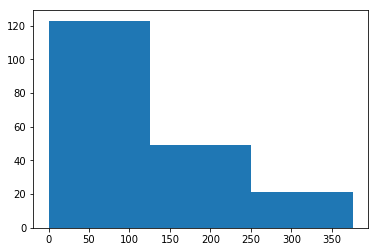

In [5]:
plt.hist(drinks['beer'],bins=3) # bins is a parameter in plt.hist(). Try changing the bins value.
plt.show()

Pandas also has built-in methods for plotting. We can use these methods by writing .plot() on the end of the pandas series we want to plot. We still have to call the matplotlib .show() method, however.

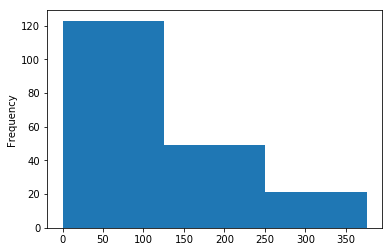

In [8]:
# I can also plot this using pandas syntax

drinks.beer.plot(kind='hist',bins=3)
plt.show()

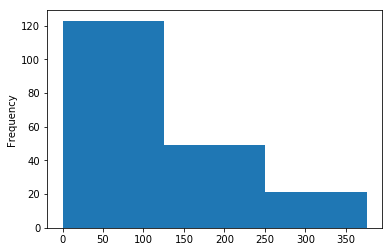

In [9]:
drinks['beer'].plot(kind='hist',bins=3)
plt.show()

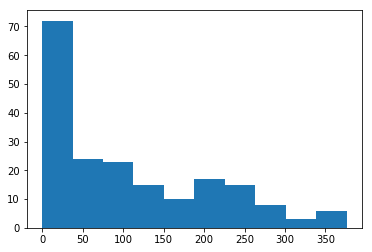

In [10]:
plt.hist(drinks['beer']) # There is a default number of bins, so we don't necessarily have to set it ourselves.
plt.show()

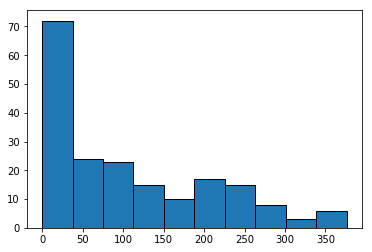

In [11]:
# Add black separating lines
plt.hist(drinks['beer'],ec='black') # Here, I'm using the ec parameter to add black lines to better identify my 
plt.show()                          # different bins

In [12]:
# We can use IPython magic to make our matplotlib visualizations higher resolution. It might not be easy to see on
# your computer screen, but when you're showing your charts on the projector, this can make a big difference.
%config InlineBackend.figure_format = 'retina'

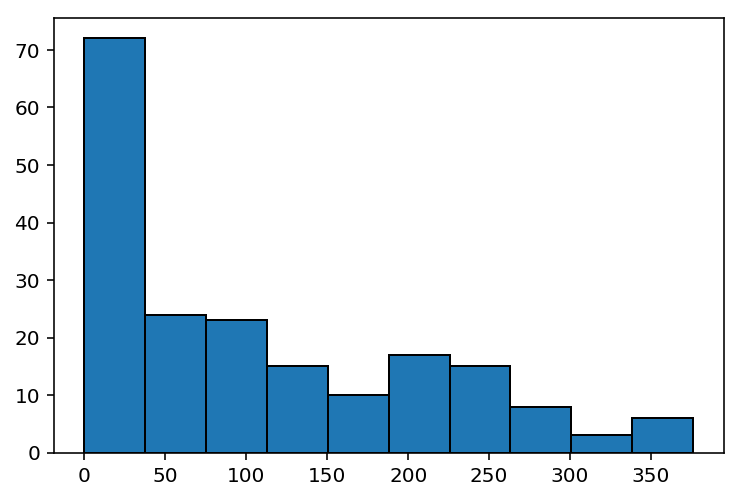

In [13]:
plt.hist(drinks['beer'],ec='black')
plt.show()

In [14]:
# This IPython magic allows us to generate figures without running plt.show()

%matplotlib inline

(array([ 72.,  24.,  23.,  15.,  10.,  17.,  15.,   8.,   3.,   6.]),
 array([   0. ,   37.6,   75.2,  112.8,  150.4,  188. ,  225.6,  263.2,
         300.8,  338.4,  376. ]),
 <a list of 10 Patch objects>)

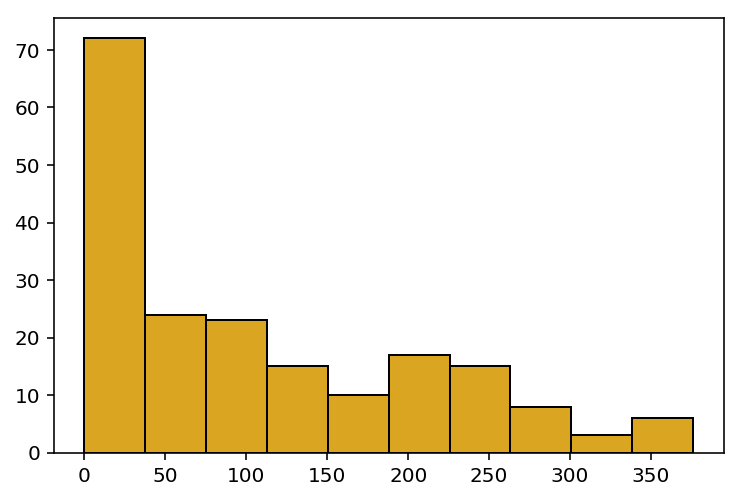

In [16]:
# We can cutomize our visualizations in almost every way imaginable. Thinking back to Joseph Nelson's lecture, 
# let's make this an intuitive, beer-ish color. I can look up some of the available matplotlib colors here: 
# https://matplotlib.org/users/colors.html
plt.hist(drinks['beer'], ec='black', color='goldenrod')

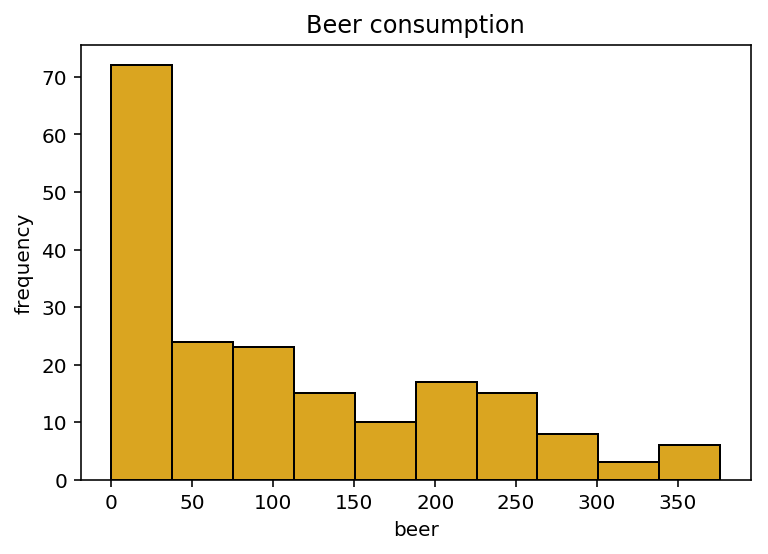

In [17]:
# Any good chart should have its axes labeled. We can do this using plt.xlabel and plt.ylabel.
# plt.title allows us to add a title. Bonus Activity: Come up with a better title than this!
# (Think: Joseph's YSFB lecture)
plt.hist(drinks['beer'], ec='black', color='goldenrod')
plt.xlabel('beer')
plt.ylabel('frequency')
plt.title('Beer consumption')

In [18]:
# We can set the parameters of our visualizations (matplotlib calls them 'figures') using the rcParams method.
# Here, we're setting the figure size and the font size. We're using a tuple for the figure size because we're 
# setting both the height and width (since it's 2-dimensional).
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 17

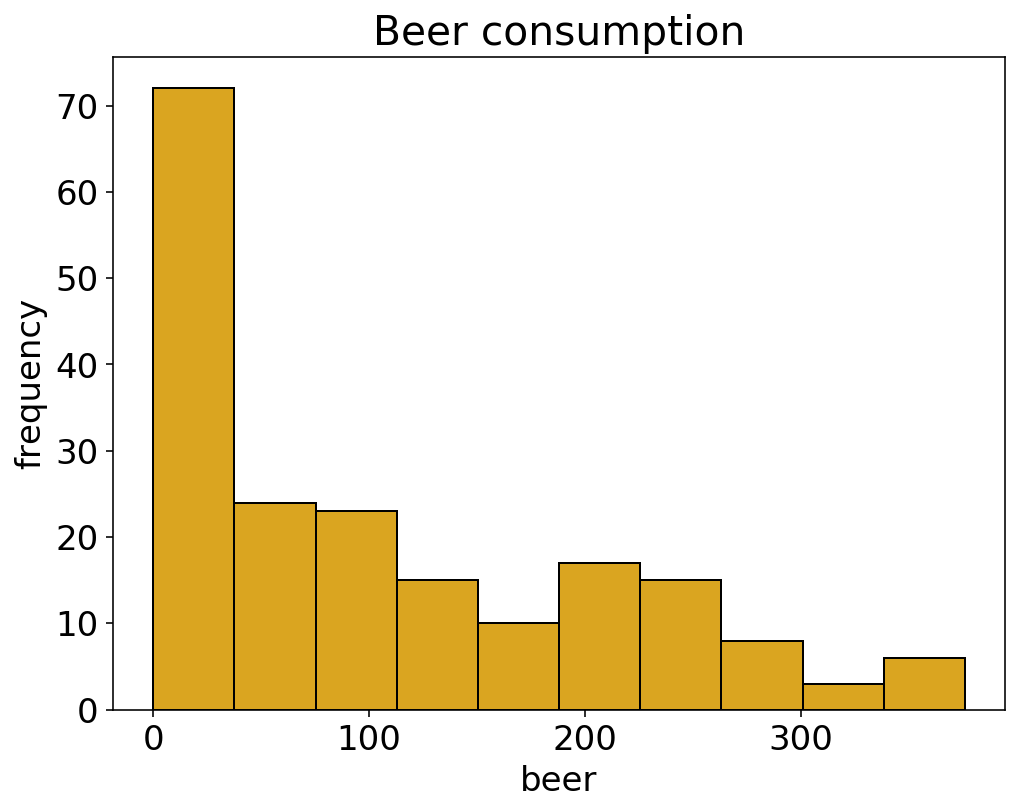

In [19]:
plt.hist(drinks['beer'], ec='black', color='goldenrod')
plt.xlabel('beer')
plt.ylabel('frequency')
plt.title('Beer consumption')

## In addition to setting visual attributes individually, matplotlib also has pre-defined styles we can use. We can see the names of all the styles by using the code below:

In [20]:
plt.style.available

['_classic_test',
 'bmh',
 'classic',
 'dark_background',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn']

### To set a style, we can do this:

In [21]:
# Set a style for the notebook
plt.style.use('seaborn-pastel')

### Try out different styles. There's even a `fivethirtyeight` style.

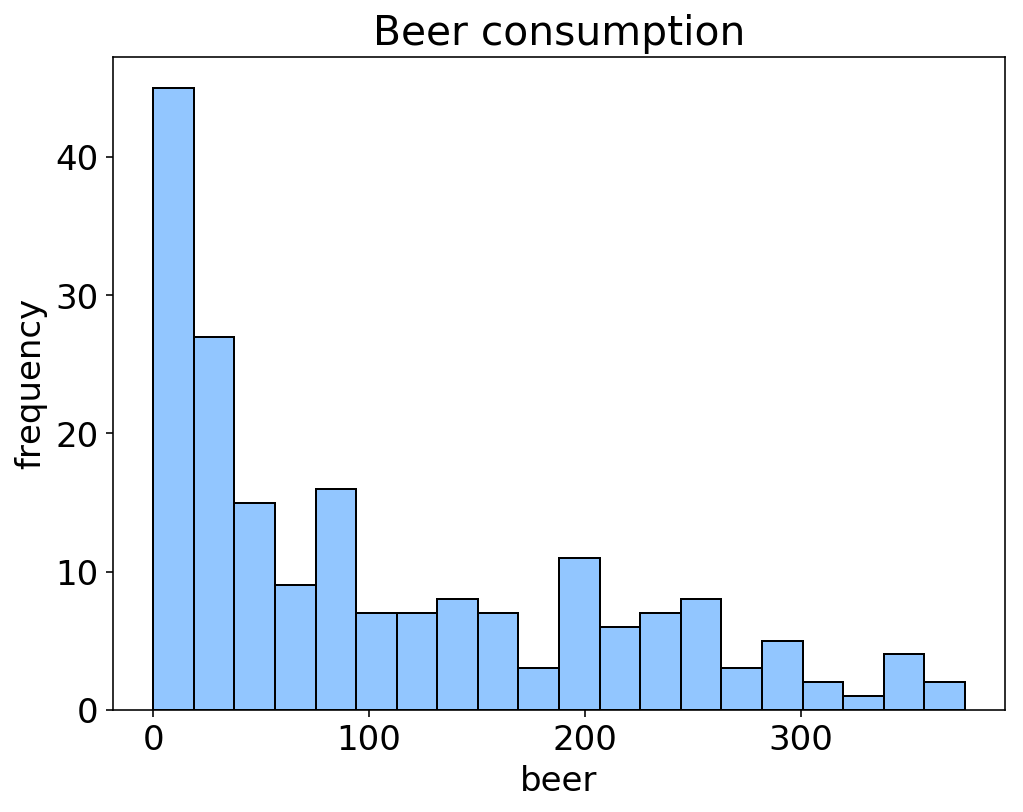

In [24]:
plt.hist(drinks['beer'], ec='black', bins=20) # If I don't specify the color now, the default is a pastel blue
plt.xlabel('beer')
plt.ylabel('frequency')
plt.title('Beer consumption')

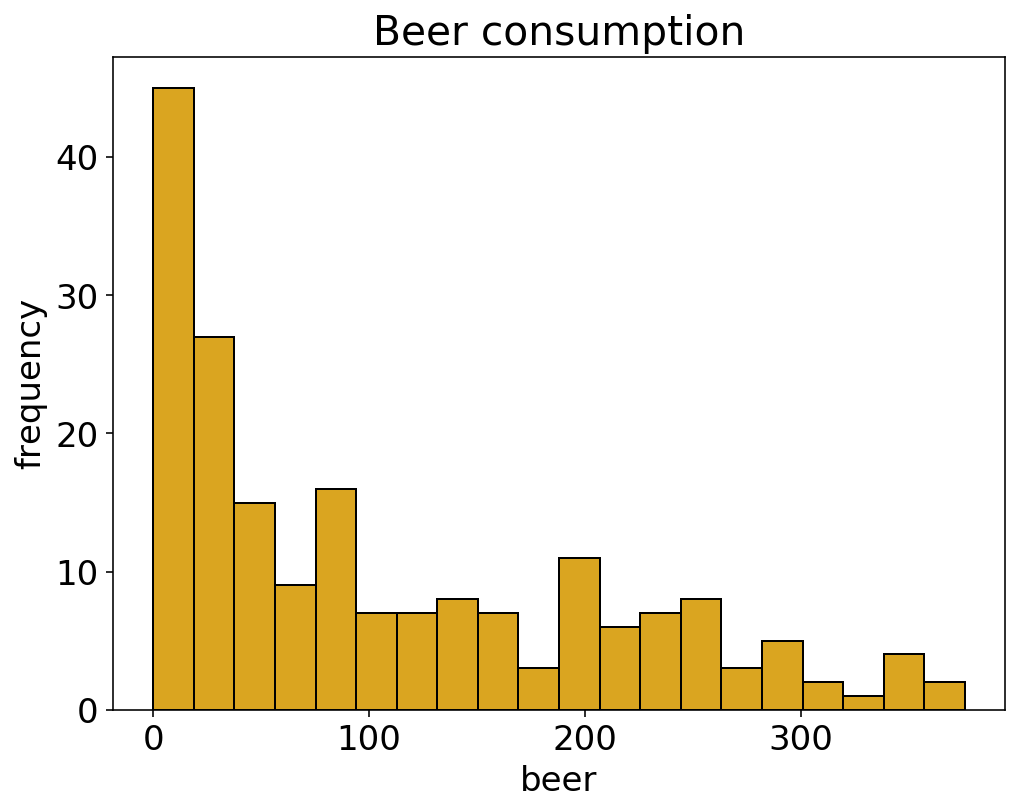

In [25]:
plt.hist(drinks['beer'], ec='black', color='goldenrod', bins=20) # I still think goldenrod is appropriate for beer.
plt.xlabel('beer')
plt.ylabel('frequency')
plt.title('Beer consumption')

### We can plot multiple histograms (as well as other charts) on top of each other. Because I want to be able to see both of my histograms, I'm going to set the `alpha` parameter in each histogram. This parameter controls how transparent each histogram is. 

Try modifying the alpha parameters in the code below and see what happens

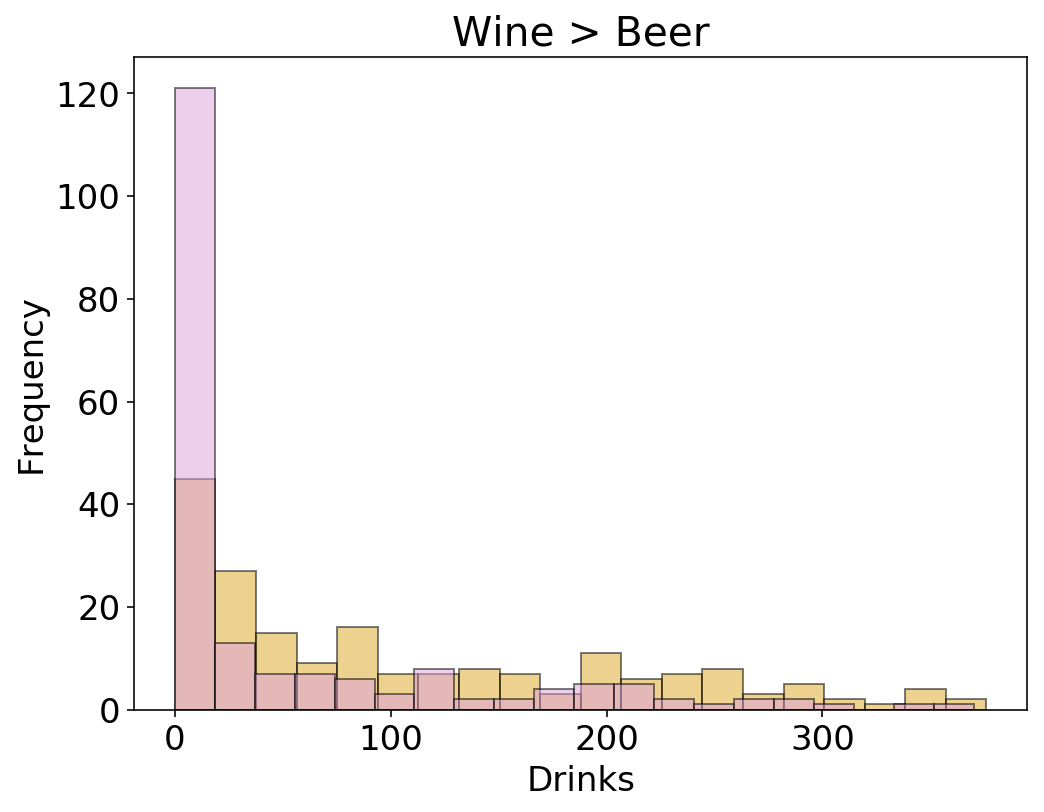

In [28]:
plt.hist(drinks['beer'], ec='black', color='goldenrod', bins=20, alpha = 0.5)
plt.hist(drinks['wine'], ec='black', color='plum', bins=20, alpha = 0.5)
plt.xlabel('Drinks')
plt.ylabel('Frequency')
plt.title('Wine > Beer')

### Since I've got two different histograms, I want to add a legend so that the audience knows what each histogram represents. I can create this legend using the `plt.legend` method. I also have to add the `label` parameter to each of my histograms so that the legend knows what to call each histogram.

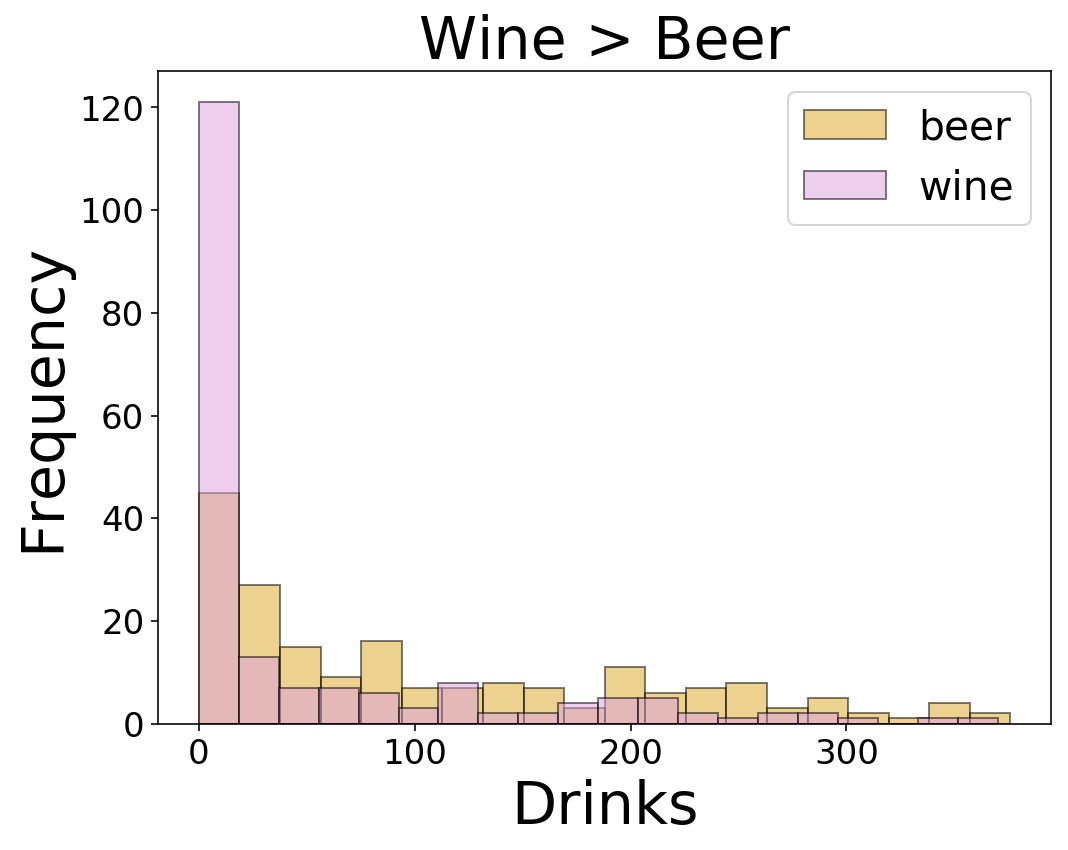

In [29]:
# Adding a legend (don't forget the labels argument in each histogram)
# Making the legend, the title, and the axes labels bigger

plt.hist(drinks['beer'], ec='black', color='goldenrod', bins=20, alpha = 0.5, label = 'beer') # label = 'beer'
plt.hist(drinks['wine'], ec='black', color='plum', bins=20, alpha = 0.5, label = 'wine') # label = 'wine'
plt.legend(fontsize = 'large') # Legend
plt.xlabel('Drinks', fontsize = 'xx-large')
plt.ylabel('Frequency', fontsize = 'xx-large')
plt.title('Wine > Beer', fontsize = 'xx-large')

### The last thing I want to do to clean up this viz is to make the bins line up. If you notice above, the misalignment of my beer and wine histograms becomes more and more apparent the farther left we go. This is because when we specified 20 bins, matplotlib was dividing the beer and wine categories into 20 even partitions, but beer and wine have different maximums:

In [30]:
print('Max beer value: ' + str(max(drinks['beer'])))
print('Max wine value: ' + str(max(drinks['wine'])))

Max beer value: 376
Max wine value: 370


### So, for beer, matplotlib is making bins of $\frac{376}{20} = 18.8$ and for wine: $\frac{370}{20} = 18.5$

### If we want to specify not only the number of bins, but also the size of each bin, we can pass a list or array of values. When we pass the `binz` list below, we're going to tell matplotib to create bins with the boundaries specified in the `binz` list. So, the first bin will be from 0 to 20, the second one from 20 to 40, and so on.

In [33]:
binz = [i * 20 for i in range(20)]
print(binz)

[0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380]


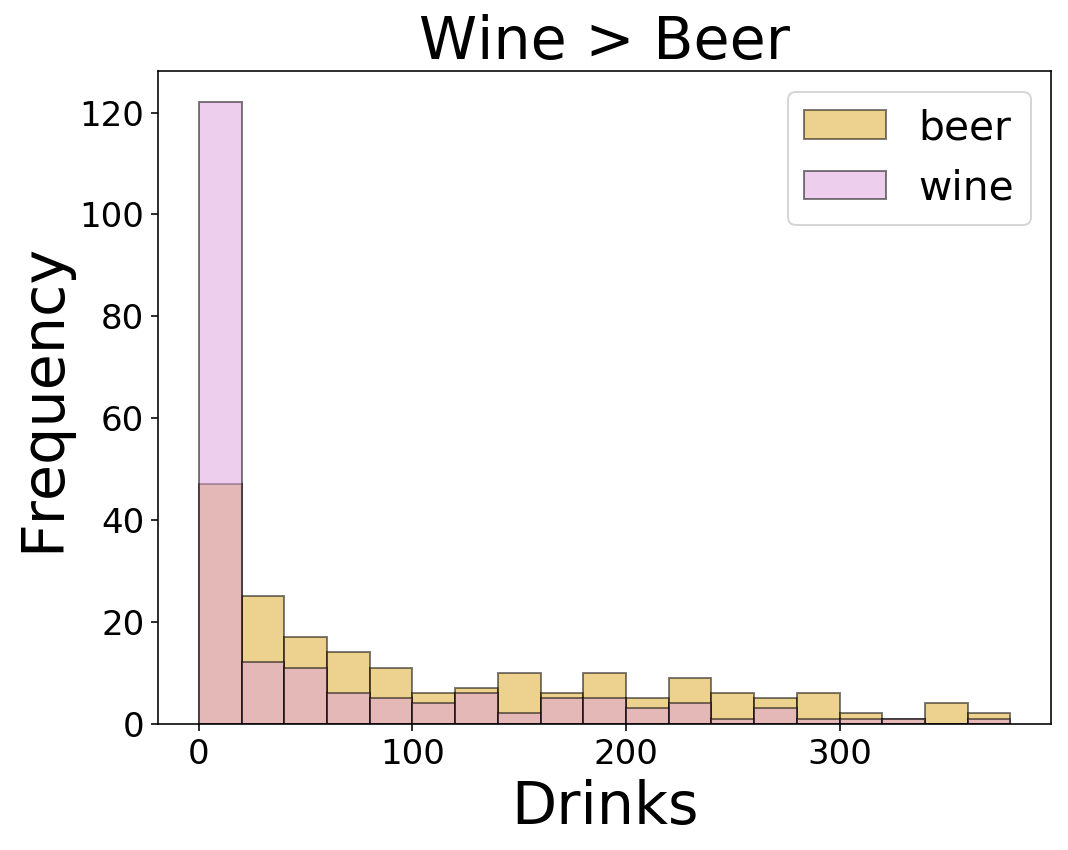

In [34]:
plt.hist(drinks['beer'], ec='black', color='goldenrod', bins=binz, alpha = 0.5, label = 'beer')
plt.hist(drinks['wine'], ec='black', color='plum', bins=binz, alpha = 0.5, label = 'wine')
plt.legend(fontsize = 'large') # Legend
plt.xlabel('Drinks', fontsize = 'xx-large')
plt.ylabel('Frequency', fontsize = 'xx-large')
plt.title('Wine > Beer', fontsize = 'xx-large')
plt.show()

In [ ]:
## Bonus activity: Make the tick labels on the x-axis correspond to the lines separating every bin.
## I.e. instead of 0, 100, 200, 300, make them be 20, 40, 60, 80,...,380



# Demo: Other plots in Matplotlib
---
### We can make a lot more than just histograms using Matplotlib and Pandas. We'll go through a bunch of different visualizations below.

### Density plots are a smoothed version of histograms

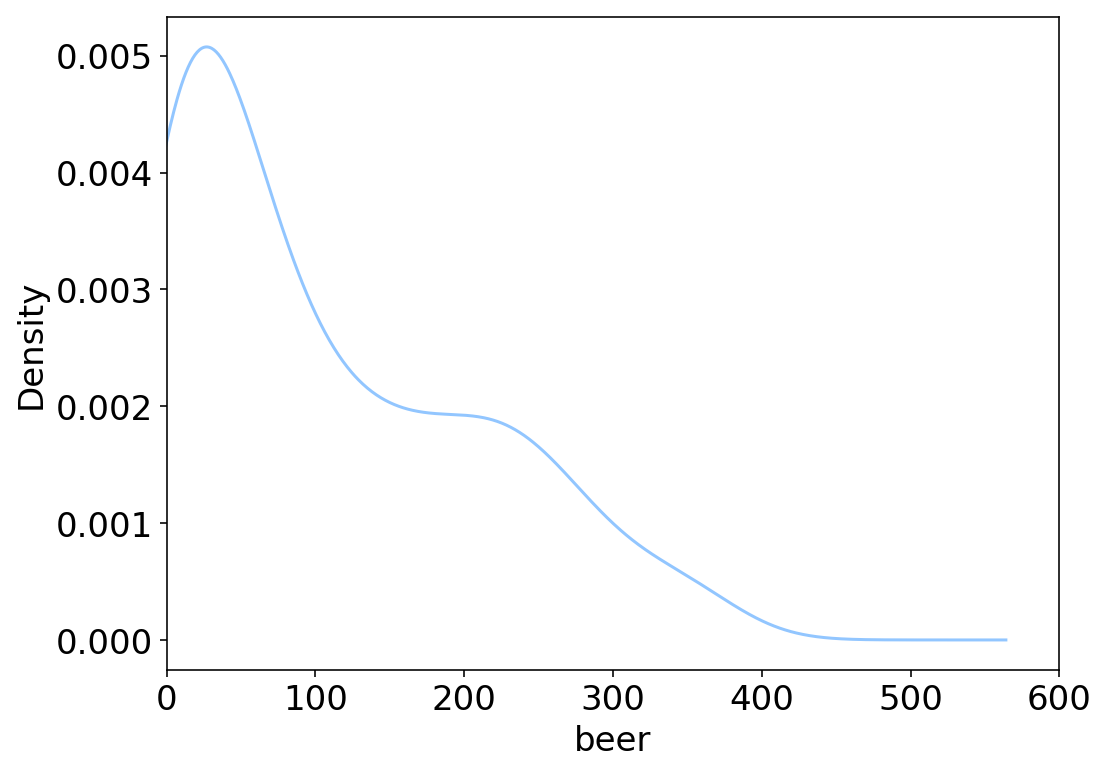

In [35]:
# Smoothed curve showing the distribution of all our observations using pandas plotting.
drinks.beer.plot(kind='density', xlim=(0, 600)) # The xlim parameter allows us to set a limit on the x-axis
plt.xlabel('beer')

## Scatter plots allow us to look at the relationship between two variables. In this case, we are plotting wine vs. beer, to see if there's any relationship.

(0, 400)

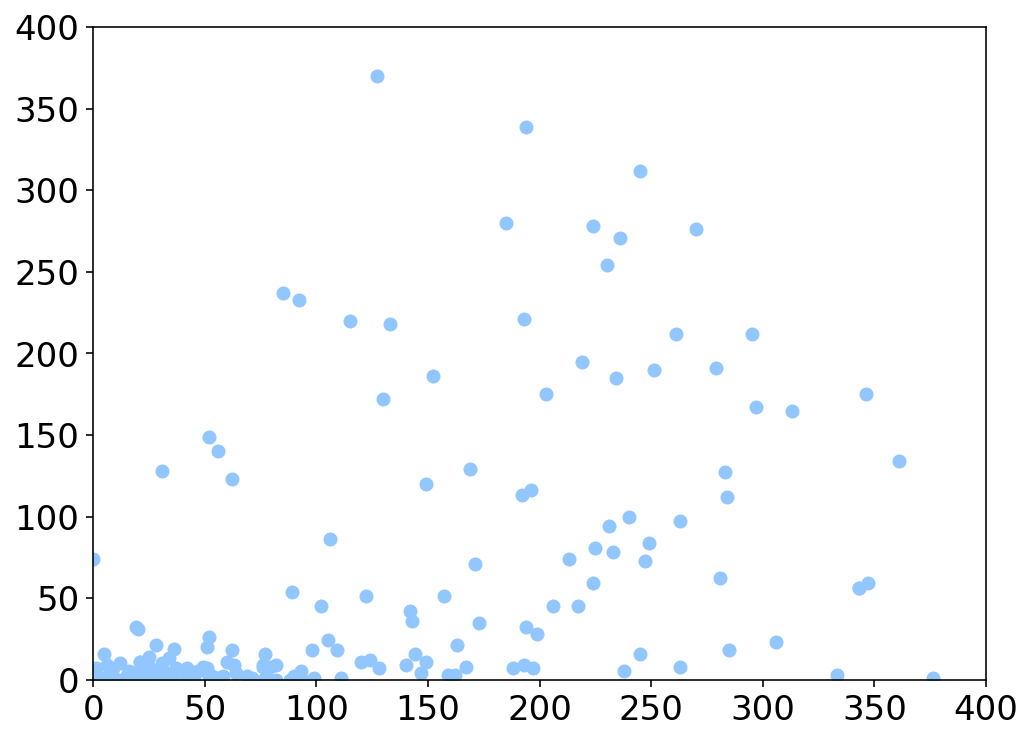

In [30]:
# Scatter plot
plt.scatter(x=drinks['beer'], y=drinks['wine'])
plt.xlim(0,400)
plt.ylim(0,400)

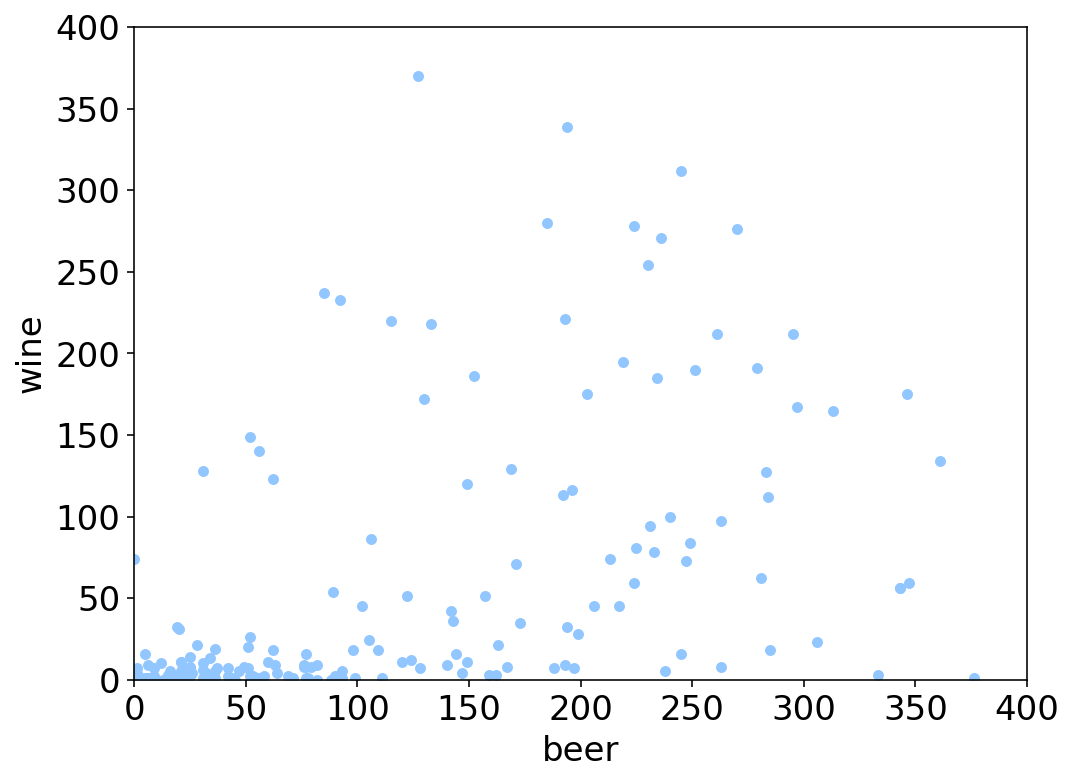

In [36]:
# Here's a way to plot the exact same thing using Pandas plotting. We specify what the x and y axes with the
# appropriately named x and y parameters

drinks.plot(kind='scatter', x='beer', y='wine', xlim=(0,400), ylim=(0,400))

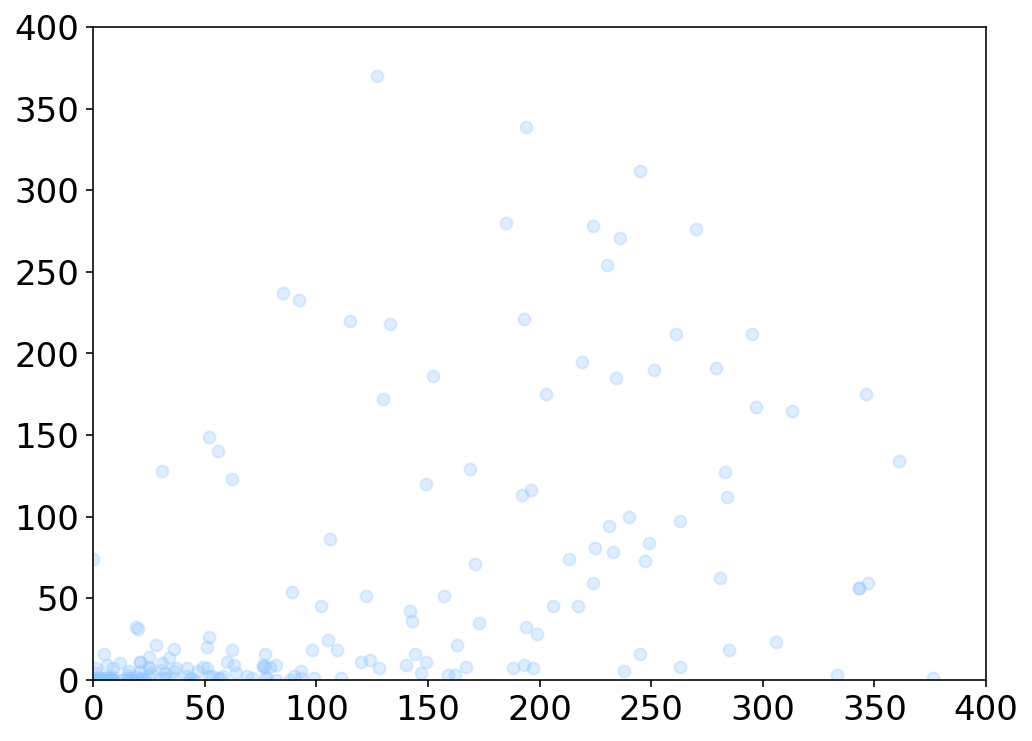

In [41]:
# Just as we did with the histograms, we can set an alpha value to make the data points more transparent so that
# we can get a better idea of where data points are clustered. The darker the points, the more data points are 
# overlapping.

plt.scatter(x=drinks['beer'], y=drinks['wine'], alpha=0.3);
plt.xlim(0,400);
plt.ylim(0,400);

## Scatterplots only plot in two dimensions, but we might want to add another dimension. One way of doing this is to add a color map. In the example below, we're coloring each data point by what the level of spirit consumption was for that observation. The more spirits a country consumed, the darker the shade of blue.

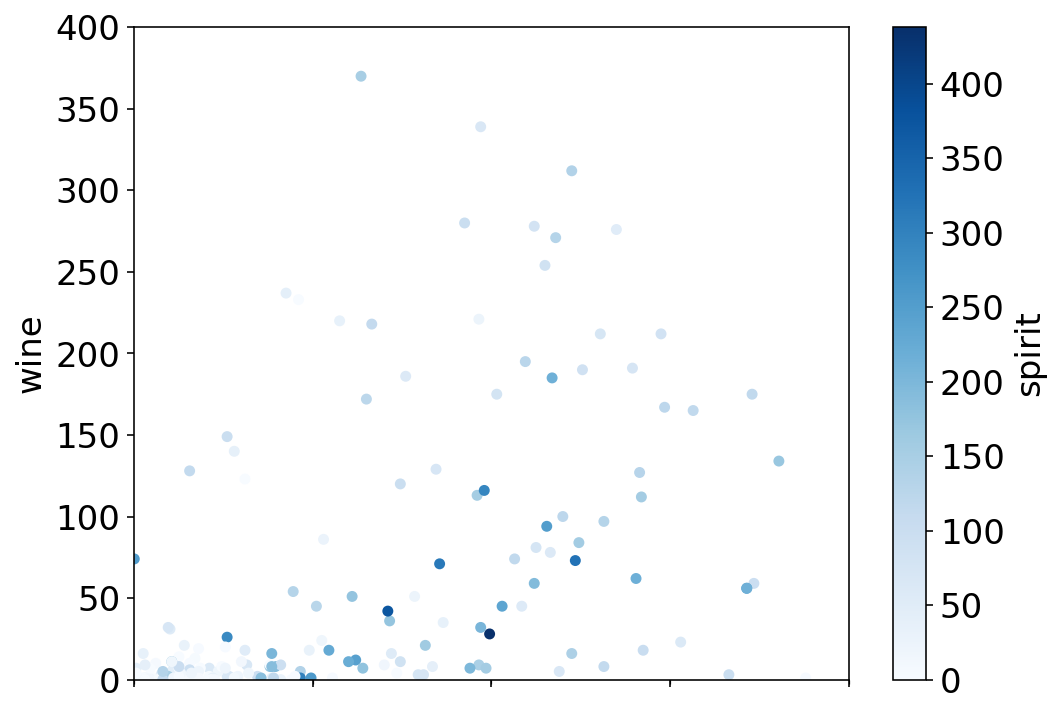

In [42]:
# Use a colormap to add another dimension to data
drinks.plot(kind='scatter', x='beer', y='wine', c='spirit', colormap='Blues', xlim=(0,400), ylim=(0,400));

## When exploring our data, we might want to see the relationships among several variables. Pandas has a handy method for doing this called `scatter matrix`. This will output scatter plots of every single pair of variables. Along the diagonal, it will plot histograms, since there's no real reason to plot a variable against itself.

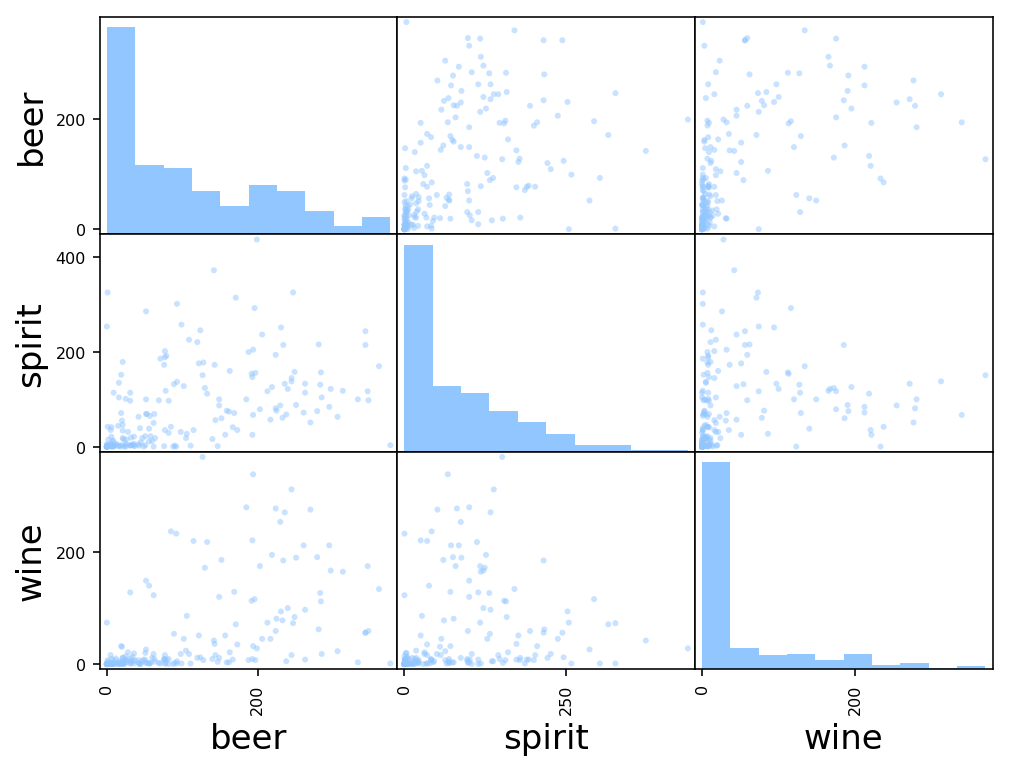

In [39]:
# Here, I'm specifying the beer, wine, and spirit columns.
pd.plotting.scatter_matrix(drinks[['beer', 'spirit', 'wine']]);

# Introducing: Seaborn!
---
Seaborn is another plotting library built on top of Matplotlib that creates much more aesthetically pleasing visualizations. Standard practice is to import `seaborn` with the alias `sns`.

In [43]:
import seaborn as sns

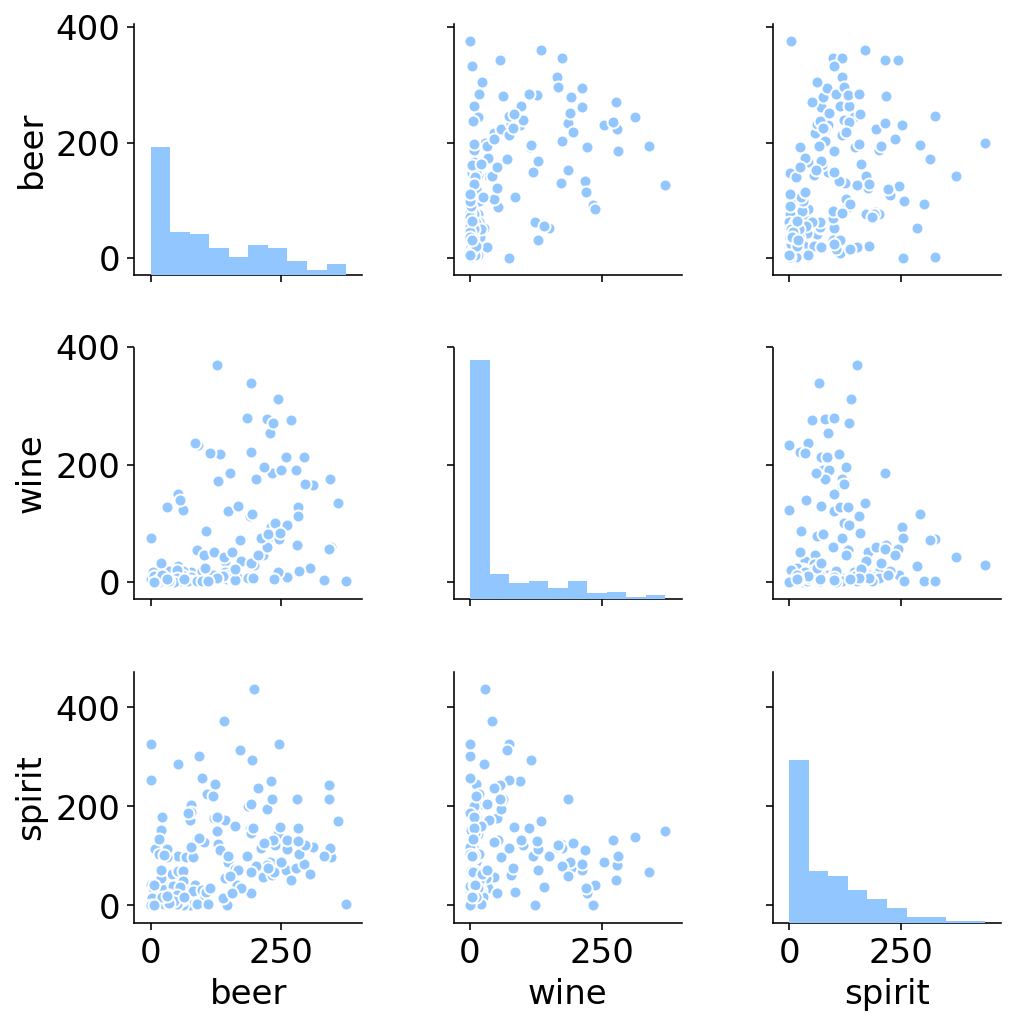

In [44]:
sns.pairplot(drinks[['beer','wine','spirit']]);

In [49]:
# Thinking back to the Pandas lecture, value_counts() counts the number of countries in each continent
drinks.continent.value_counts()

AF    53
EU    45
AS    44
NA    23
OC    16
SA    12
Name: continent, dtype: int64

## Continents is not a continuous variable, so I can't use a histogram to plot the number of countries in each continent. If I want to see the distribution of a discrete variable like continent, I can make a bar chart.  

### Note: bar chart $\neq$ histogram

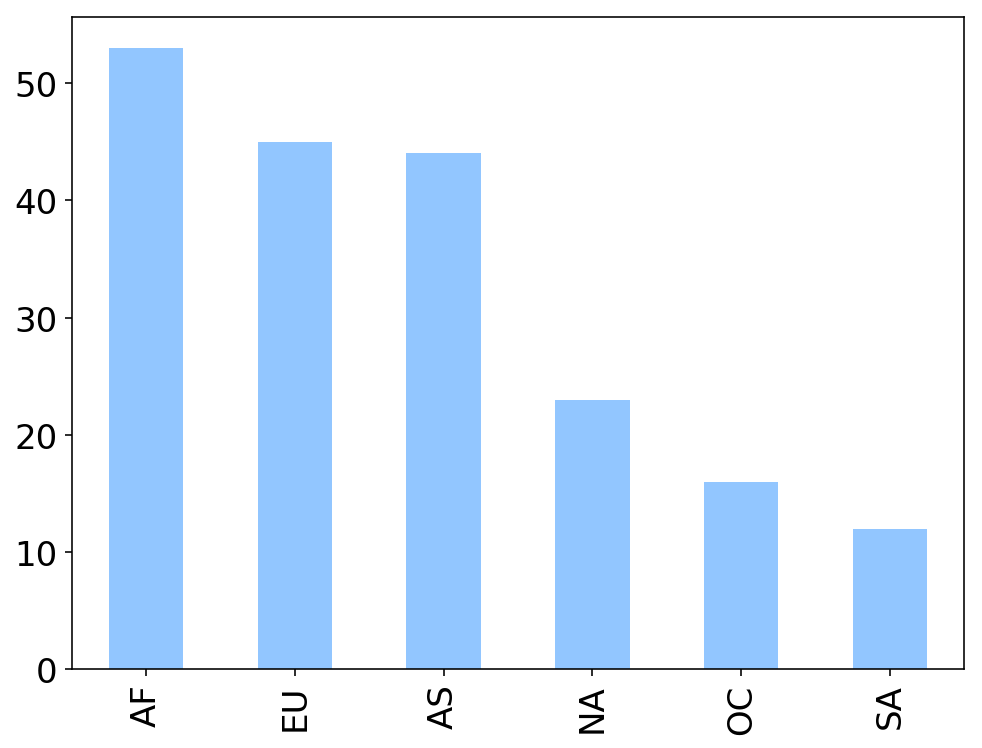

In [48]:
drinks.continent.value_counts().plot(kind='bar');

## If I want to show multiple bar charts at the same time, I'll simply select the entire dataframe, and every column will be its on bar for each row.

In [50]:
# calculate the mean alcohol amounts for each continent
drinks.groupby('continent').mean()

,beer,spirit,wine,liters
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
NA,145.434783,165.739130,24.521739,5.995652
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


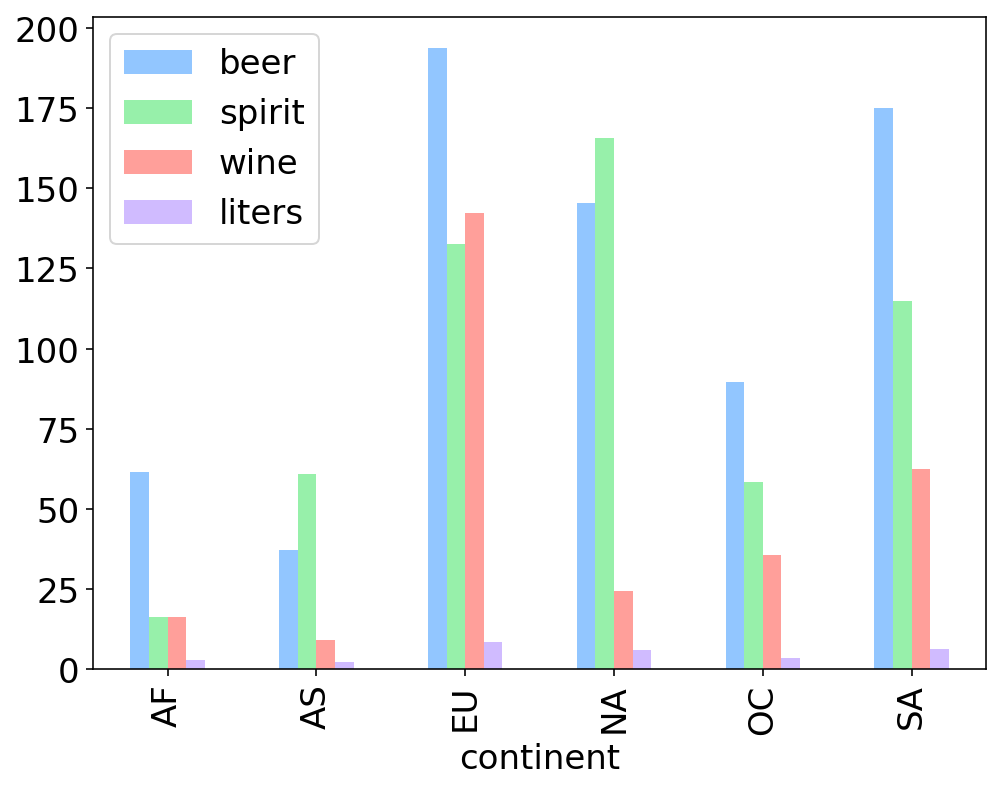

In [51]:
# side-by-side bar plots
drinks.groupby('continent').mean().plot(kind='bar');

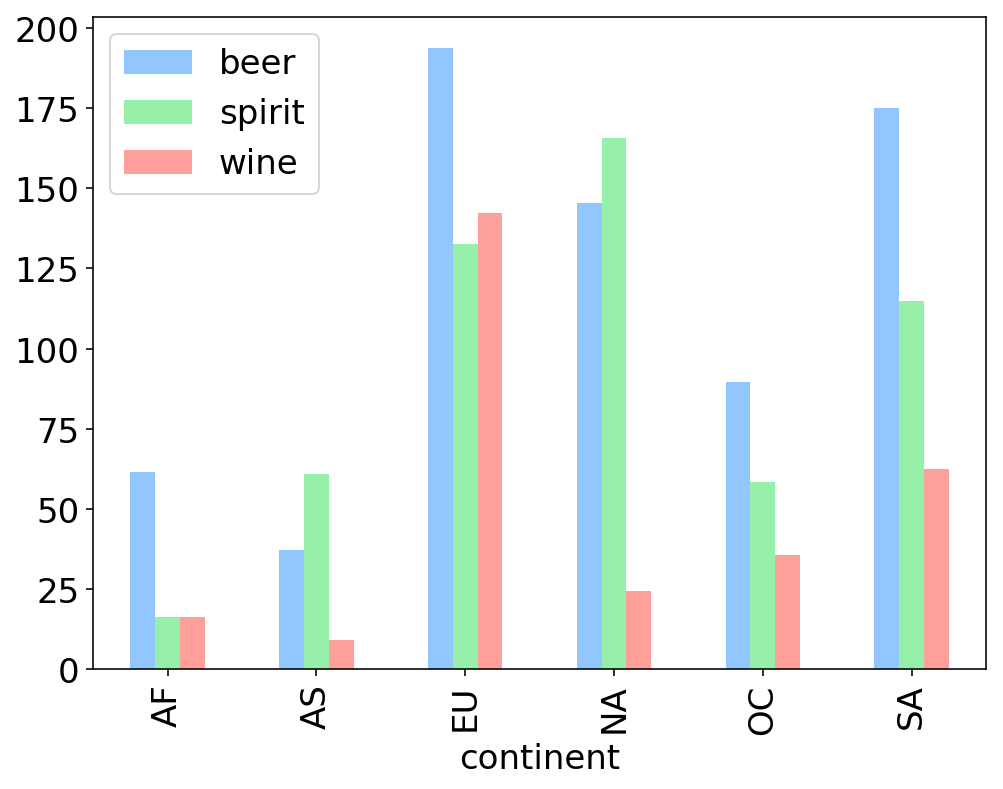

In [53]:
# If I don't want a certain column, I can just drop it
drinks.groupby('continent').mean().drop('liters', axis=1).plot(kind='bar');

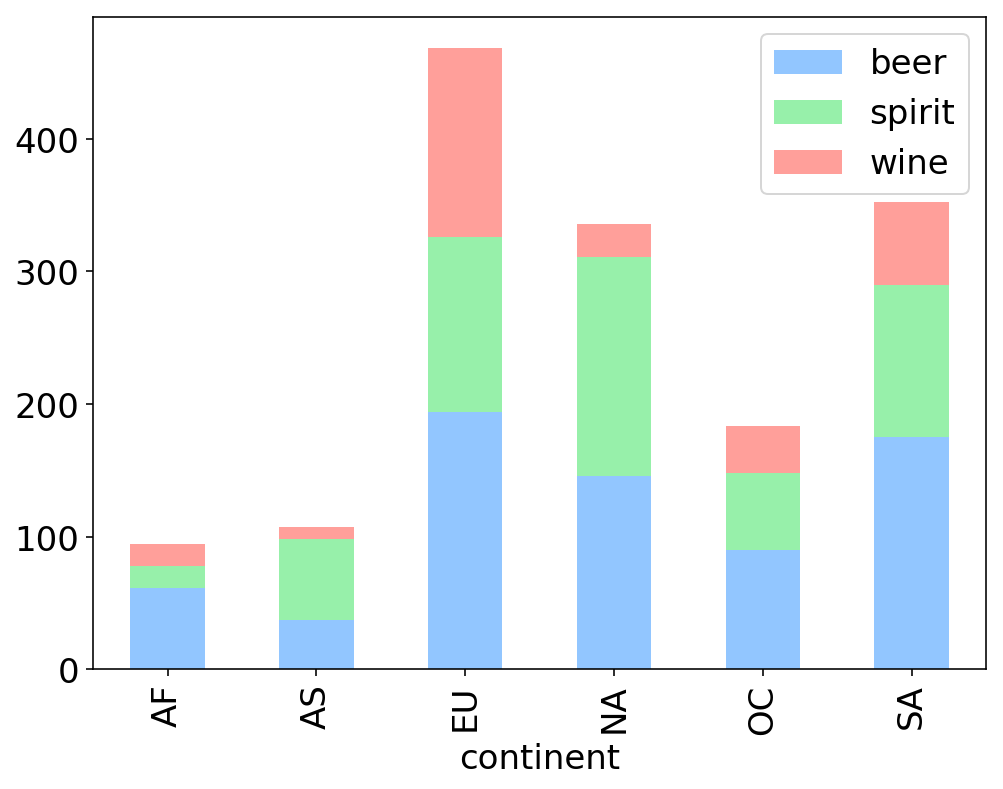

In [54]:
# I can also do stacked bar plots
drinks.groupby('continent').mean().drop('liters', axis=1).plot(kind='bar', stacked=True);

## Box Plots

### Box Plot: show quartiles (and outliers) for one or more numerical variables
Five-number summary:
* min = minimum value
* $25\%$ = first quartile ($Q_1$) = median of the lower half of the data
* $50\%$ = second quartile ($Q_2$) = median of the data
* $75\%$ = third quartile ($Q_3$) = median of the upper half of the data
* max = maximum value
(More useful than mean and standard deviation for describing skewed distributions)
Interquartile Range $(IQR) = Q_3 - Q_1$  

Outliers:  
below $Q_1 - 1.5 \times IQR$  
above $Q_3 + 1.5 \times IQR$  

In [45]:
# show "five-number summary" for spirit
drinks.beer.describe()

count    193.000000
mean     106.160622
std      101.143103
min        0.000000
25%       20.000000
50%       76.000000
75%      188.000000
max      376.000000
Name: beer, dtype: float64

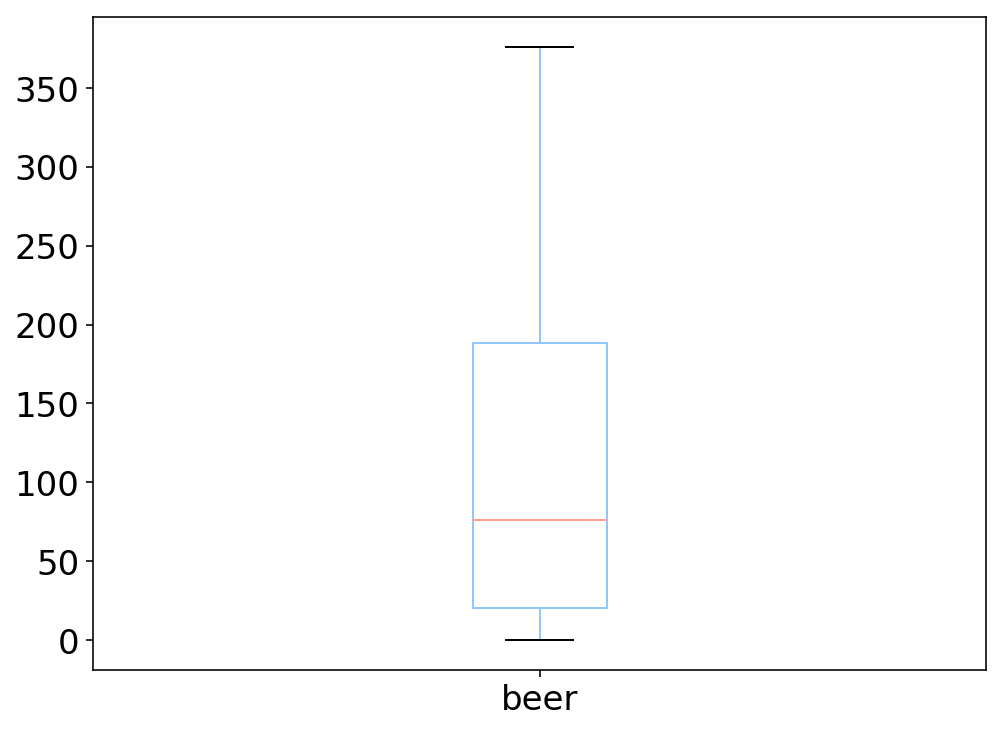

In [55]:
# compare with box plot
drinks.beer.plot(kind='box');

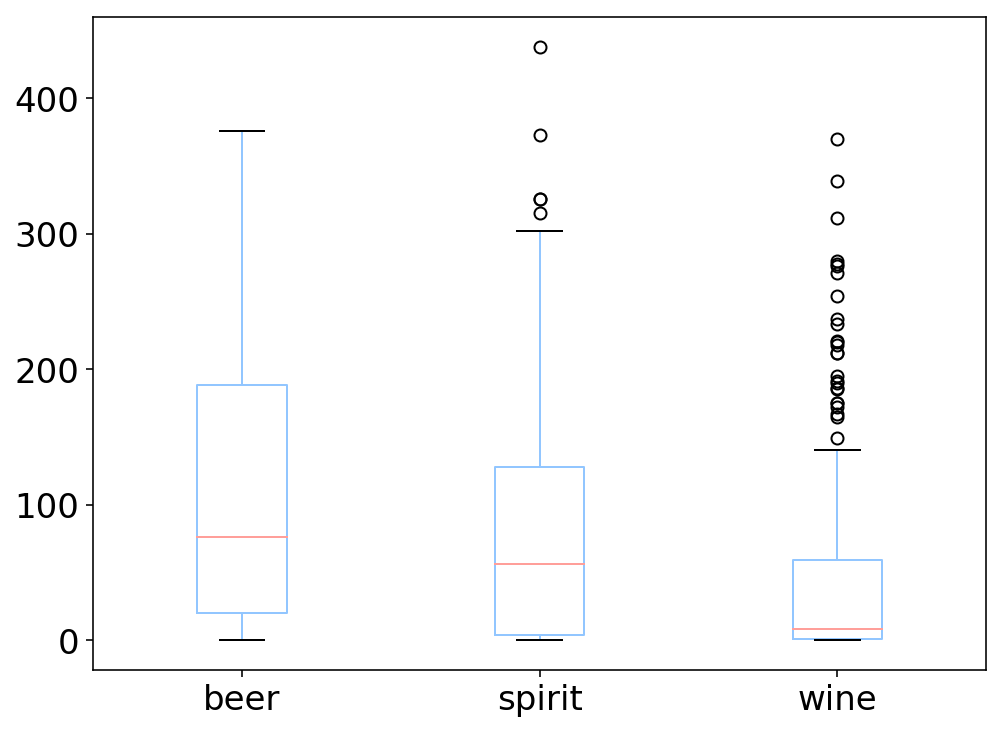

In [57]:
# Include multiple variables
# Dots represent outliers
drinks.drop('liters', axis=1).plot(kind='box');

## Line Plots: show the trend of a numerical variable over time

In [59]:
# Loading in a new dataframe
url = 'https://raw.githubusercontent.com/josephofiowa/DAT8/master/data/ufo.csv'
ufo = pd.read_csv(url)

In [60]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [61]:
# Hmmmm, we don't want time to be a string
ufo.dtypes

City               object
Colors Reported    object
Shape Reported     object
State              object
Time               object
dtype: object

In [62]:
# Introducing datetime: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html
ufo['Time'] = pd.to_datetime(ufo.Time)
ufo['Year'] = ufo.Time.dt.year

In [63]:
# Nice
ufo.dtypes

City                       object
Colors Reported            object
Shape Reported             object
State                      object
Time               datetime64[ns]
Year                        int64
dtype: object

In [64]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time,Year
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,1930
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,1930
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,1931
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,1931
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,1933


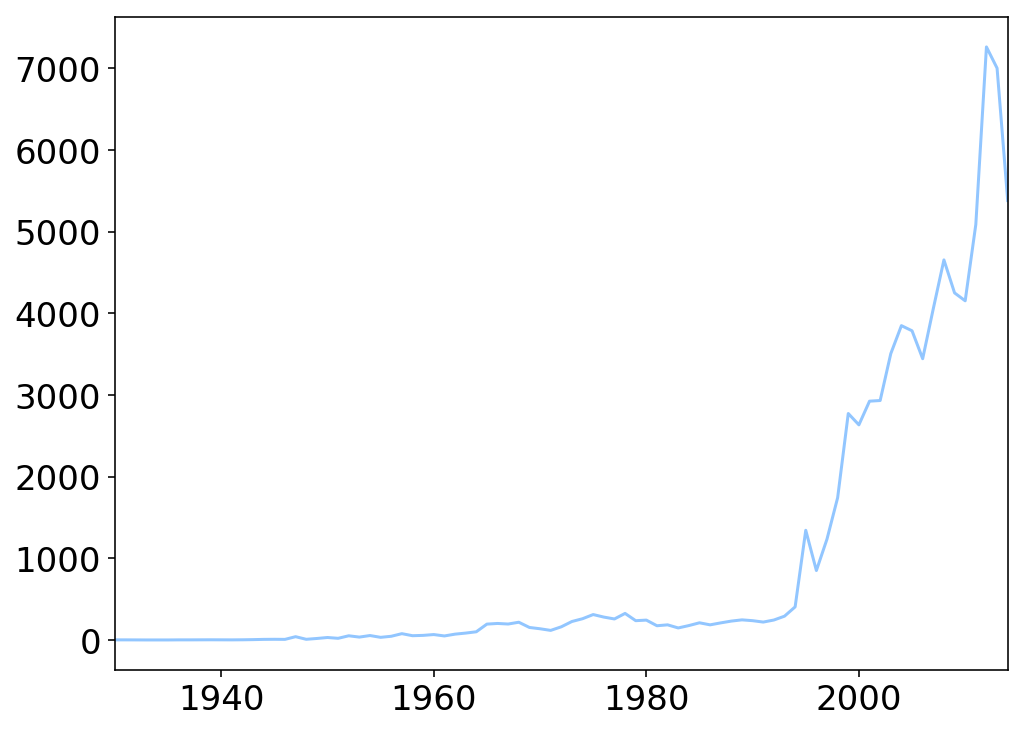

In [65]:
# If we want to plot the change in a variable over time, we need to use the sort_index() method, so that our data
# are in the correct chronological order.
ufo.Year.value_counts().sort_index().plot();

## While we can use line plots for non-timeseries data, we shouldn't, since this doesn't really make any sense.

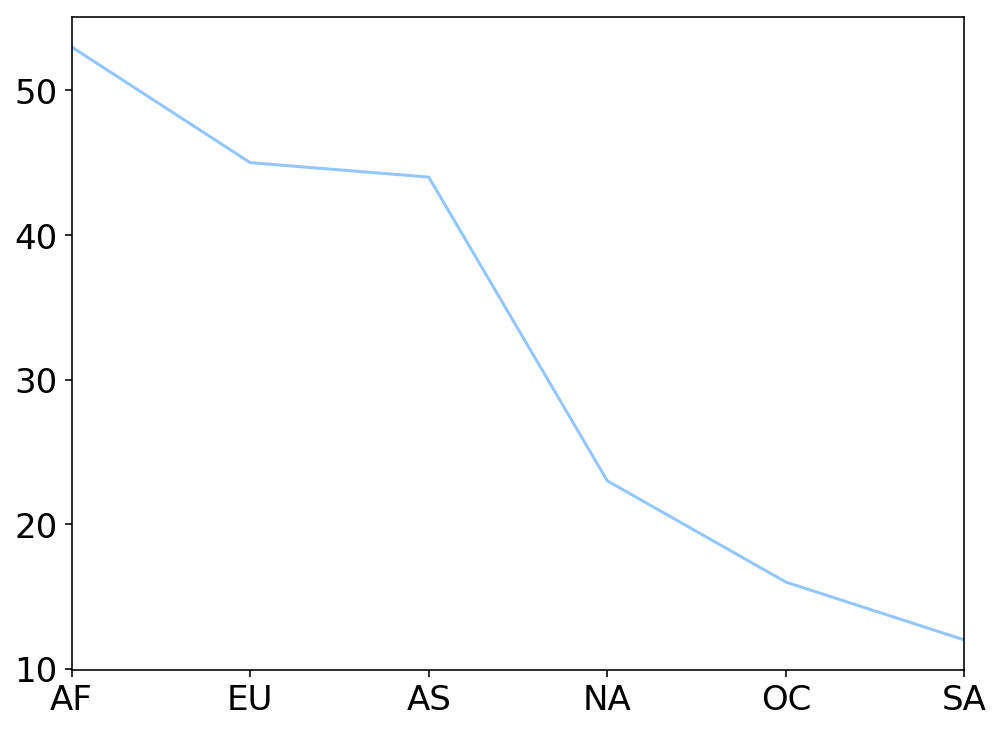

In [66]:
drinks.continent.value_counts().plot();
#value count of every continent

## Line plots don't make sense if there's no logical order
<img src="https://s-media-cache-ak0.pinimg.com/originals/26/d8/88/26d888978d61cadf1834e10c40c0516c.jpg">

## Back to Box Plots

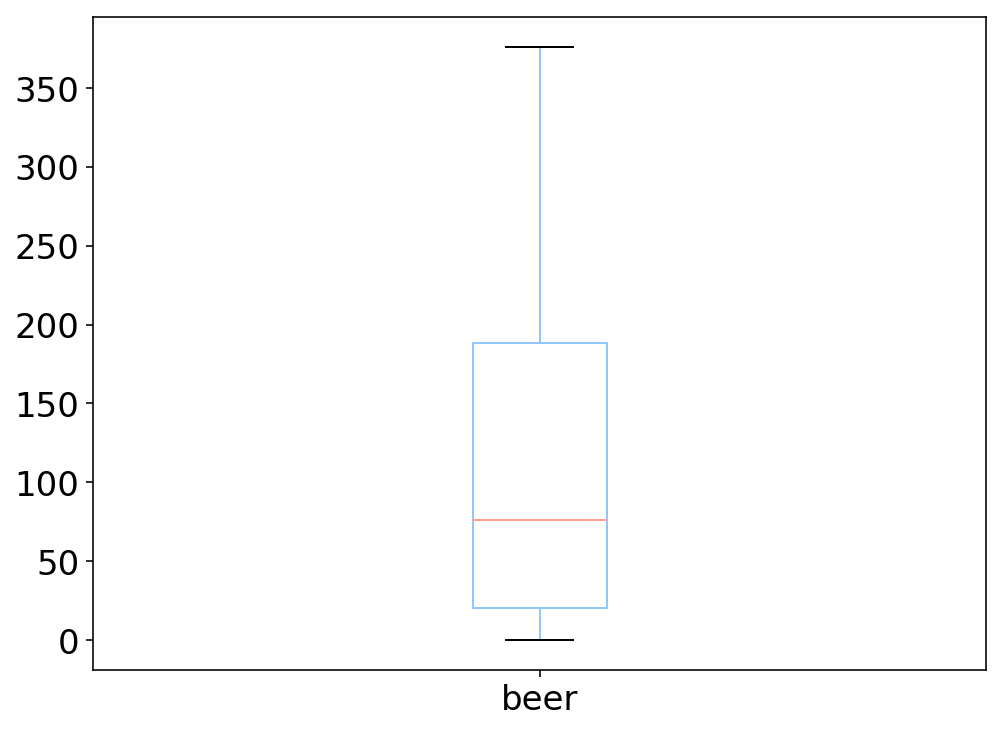

In [67]:
#what if we're trying to show one box plot for each group

#let's take a look at a box plot of beer servings again, to begin with
drinks.beer.plot(kind='box');

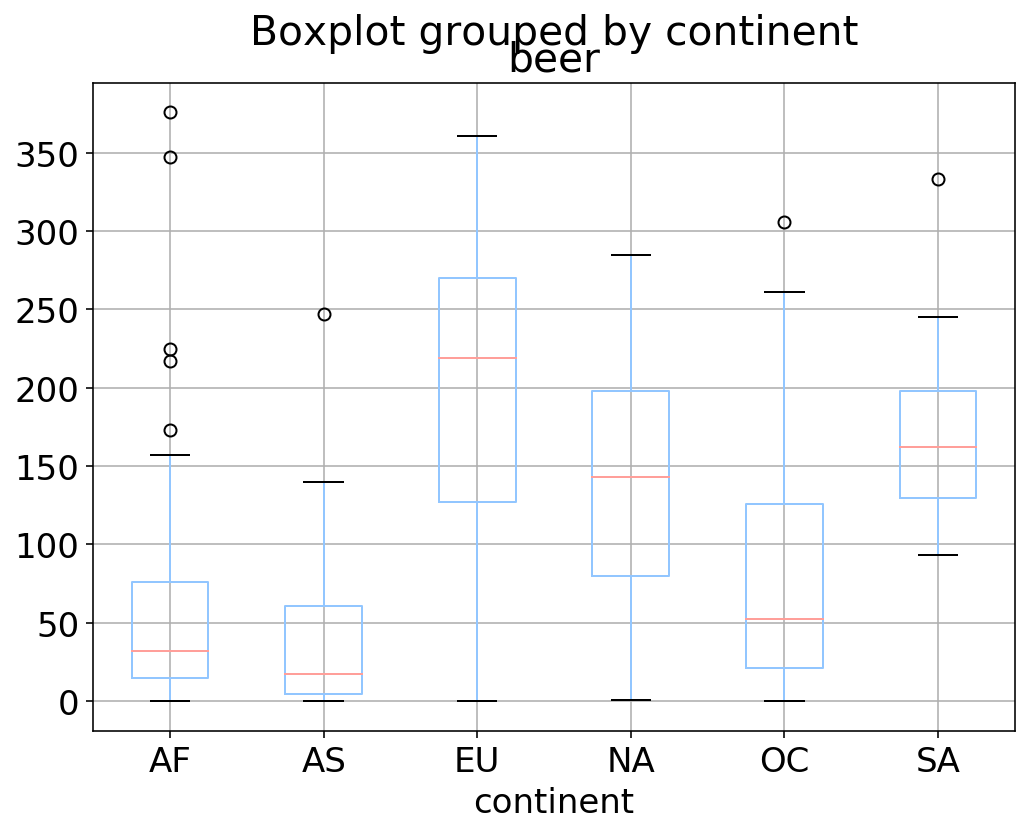

In [68]:
# box plot of beer servings grouped by continent
drinks.boxplot(column='beer', by='continent');

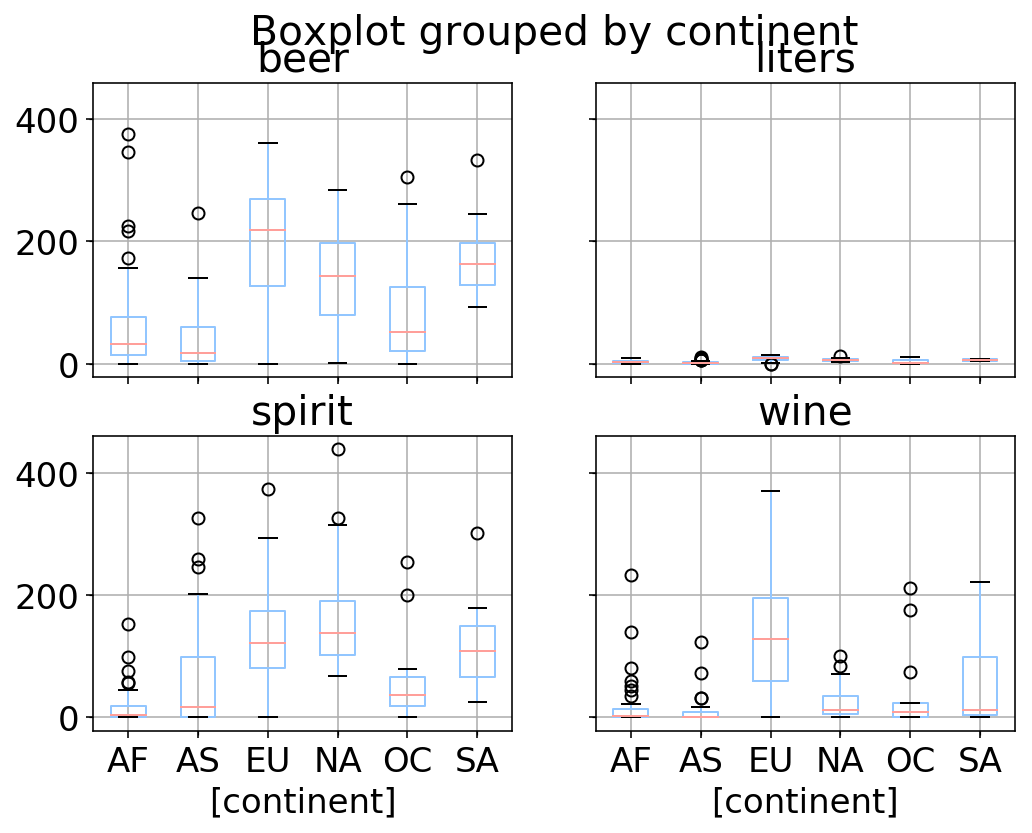

In [69]:
# box plot of all numeric columns grouped by continent
drinks.boxplot(by='continent');

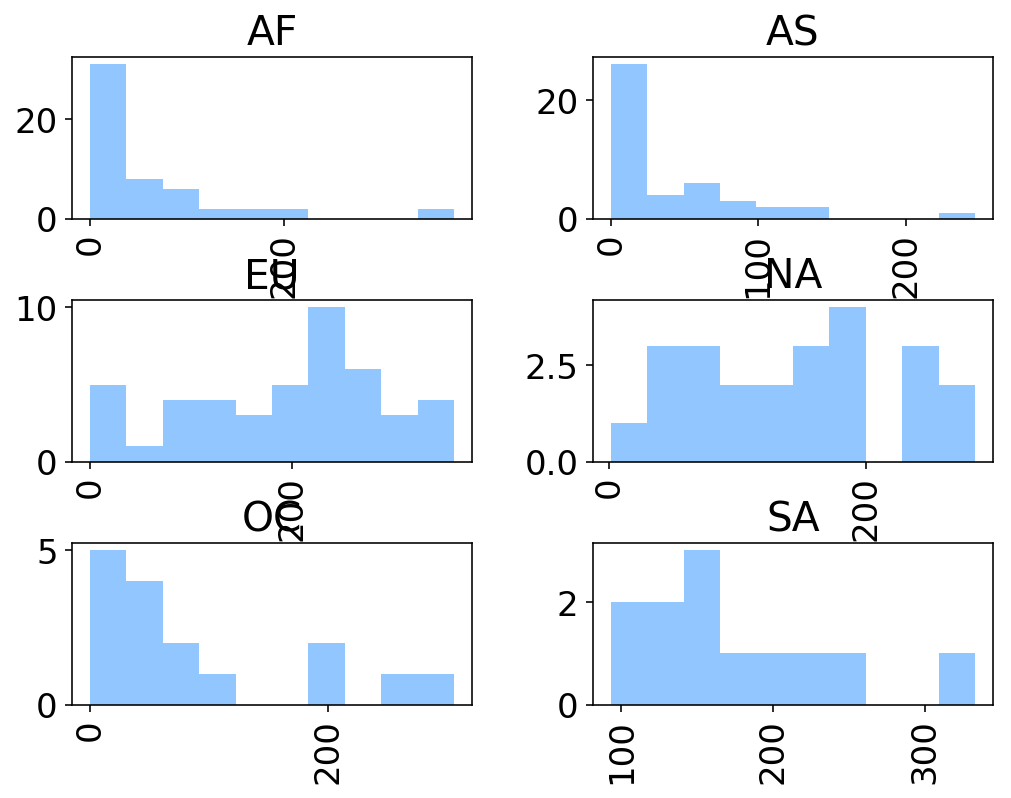

In [70]:
# histogram of beer servings grouped by continent
drinks.hist(column='beer', by='continent');

## These charts look really messy. We can get each column to share the same x-axis by setting the `sharex` parameter to `True`.

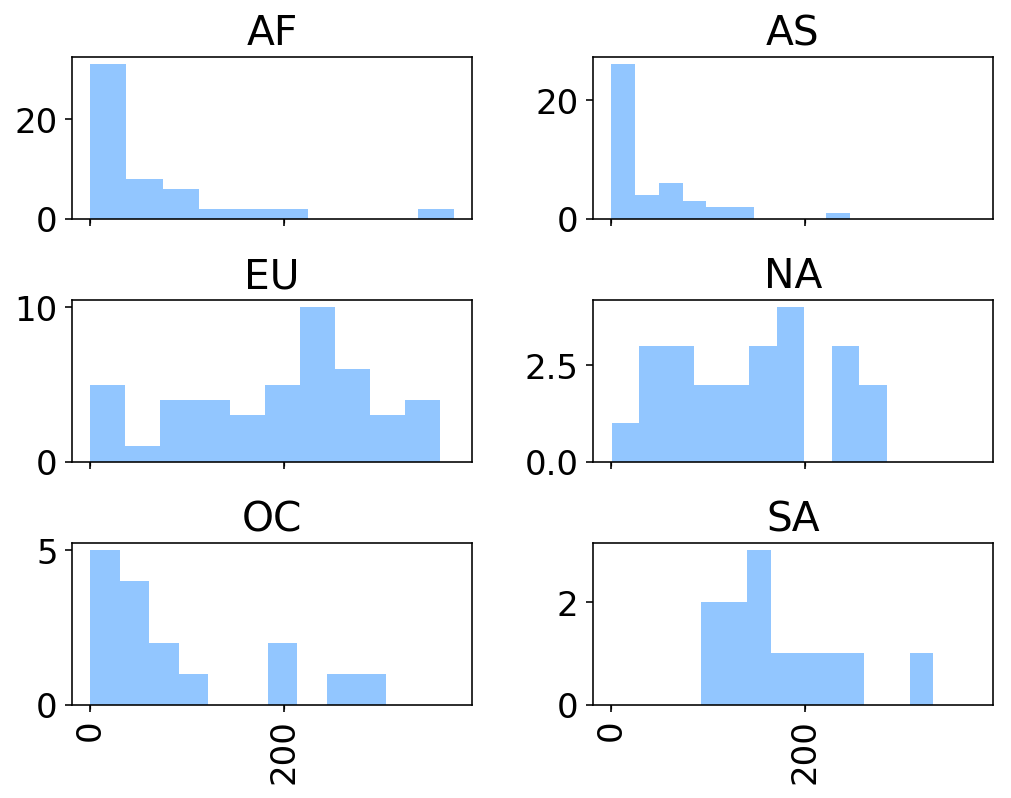

In [71]:
# share the x axes
drinks.hist(column='beer', by='continent', sharex=True);

### We can do the same thing for the y-axis

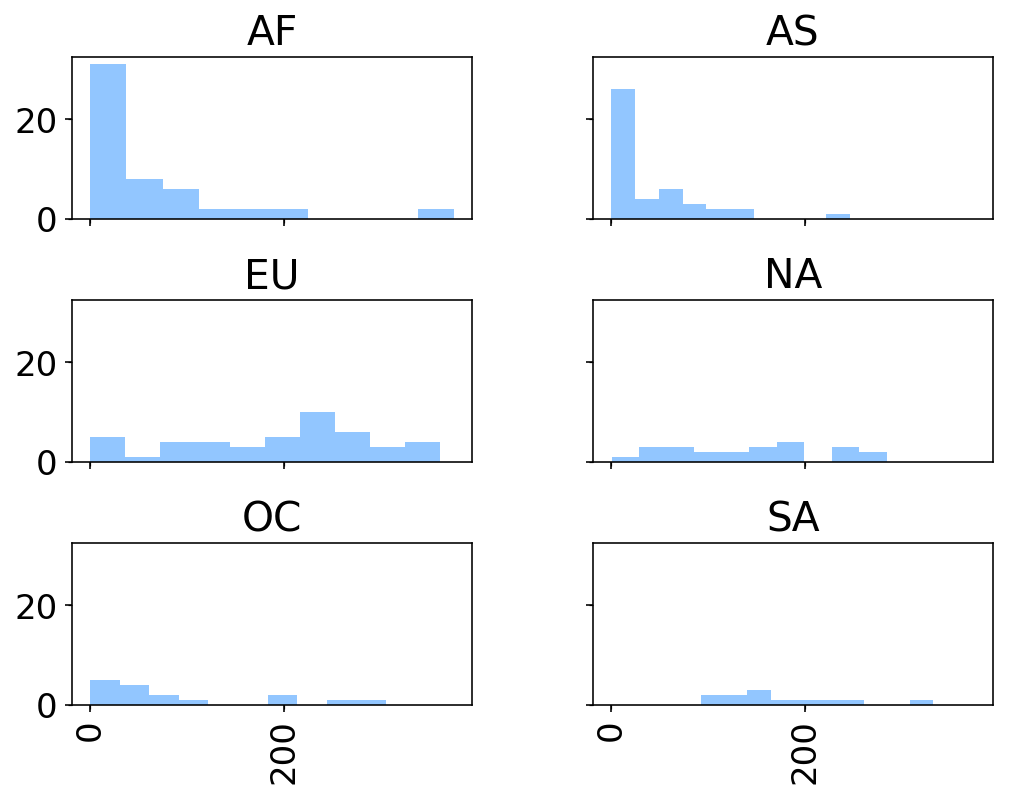

In [72]:
# share the x and y axes
drinks.hist(column='beer', by='continent', sharex=True, sharey=True);

## Maybe we want 2 rows of 3 instead of 3 rows of 2. We can use the `layout` parameter and specify the number of rows and number of columns.

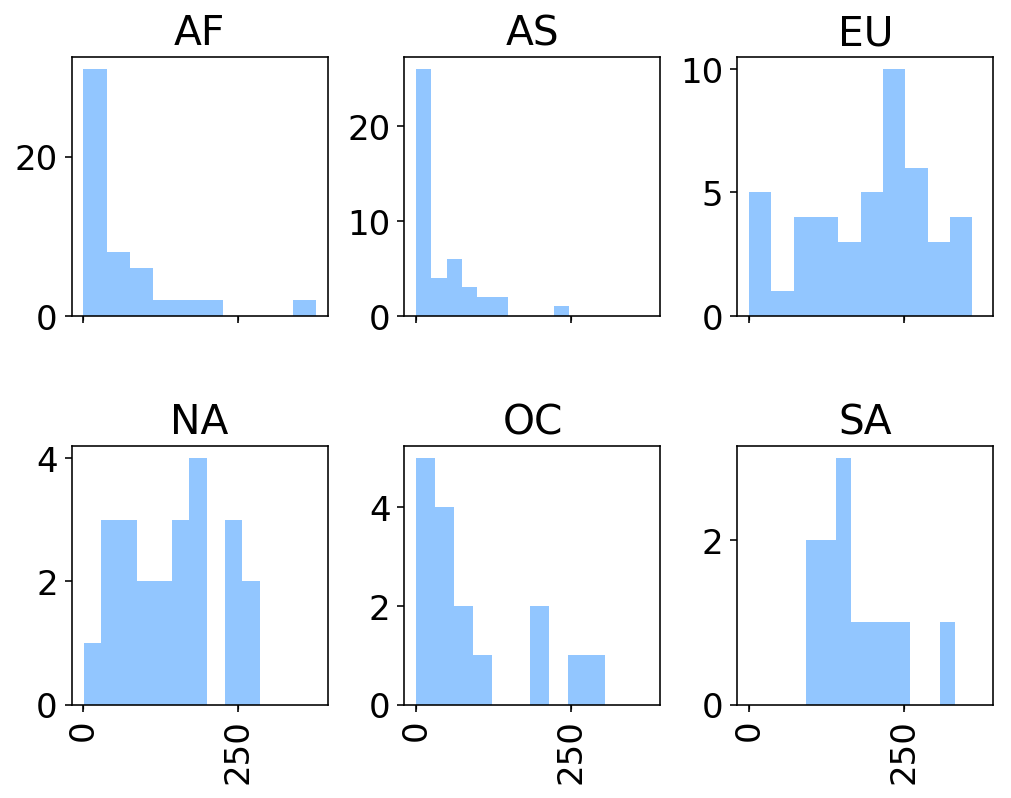

In [74]:
drinks.hist(column='beer', by='continent', sharex=True, layout=(2, 3));

## We've created a ton of visualizations, and they all look pretty nice in our jupyter notebooks, but we want to be able to use them in our presentations. To export a figure, we use the `plt.savefig` method to save the figure. This method will export the figure to the working directory, and you can then treat the image the same way you would any other. Remember, when naming your figure, you need to specify an extension (`.png`) so that other programs know what type of file it is.

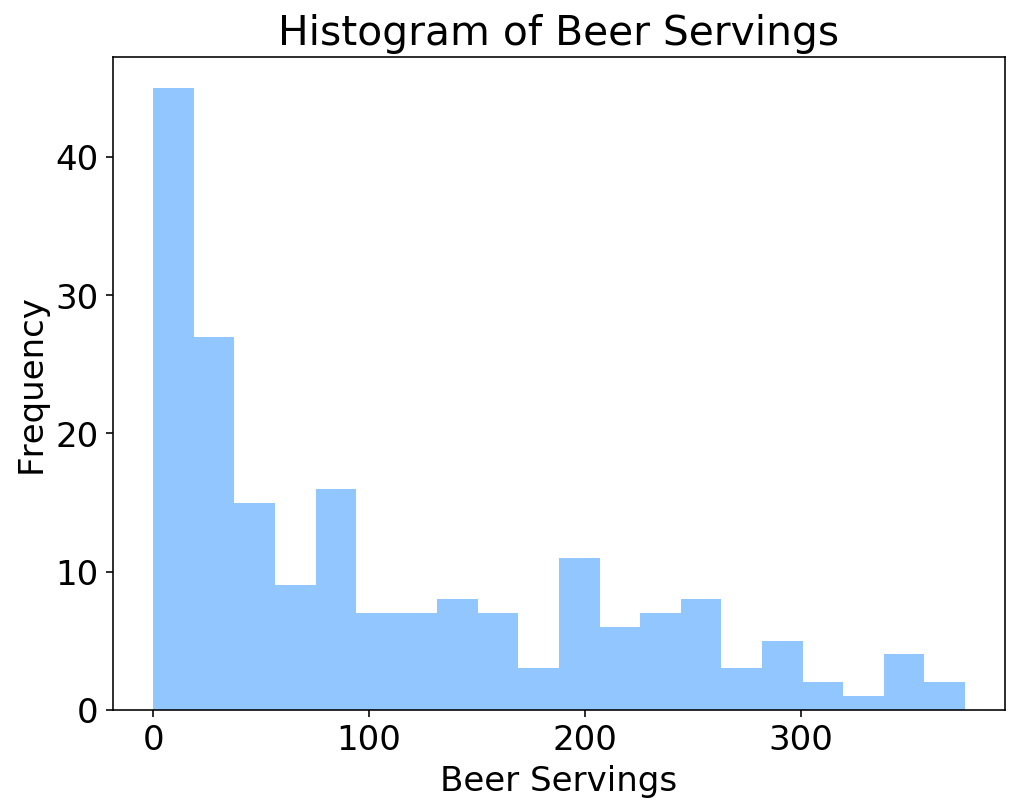

In [77]:
# Last but not least, saving figures:

drinks.beer.plot(kind='hist', bins=20, title='Histogram of Beer Servings')
plt.xlabel('Beer Servings')
plt.ylabel('Frequency')
plt.savefig('beer_histogram.png')

# Conclusion:
---
We've only dipped our toes in the water of data visualization. There's tons more you can do with Matplotlib, Seaborn, and Pandas. There are also more visualization libraries out there. The last thing I'll leave you with is this diagram of several of the elements of a matplotlib figure. Everything below is generated by code, including all the annotations.

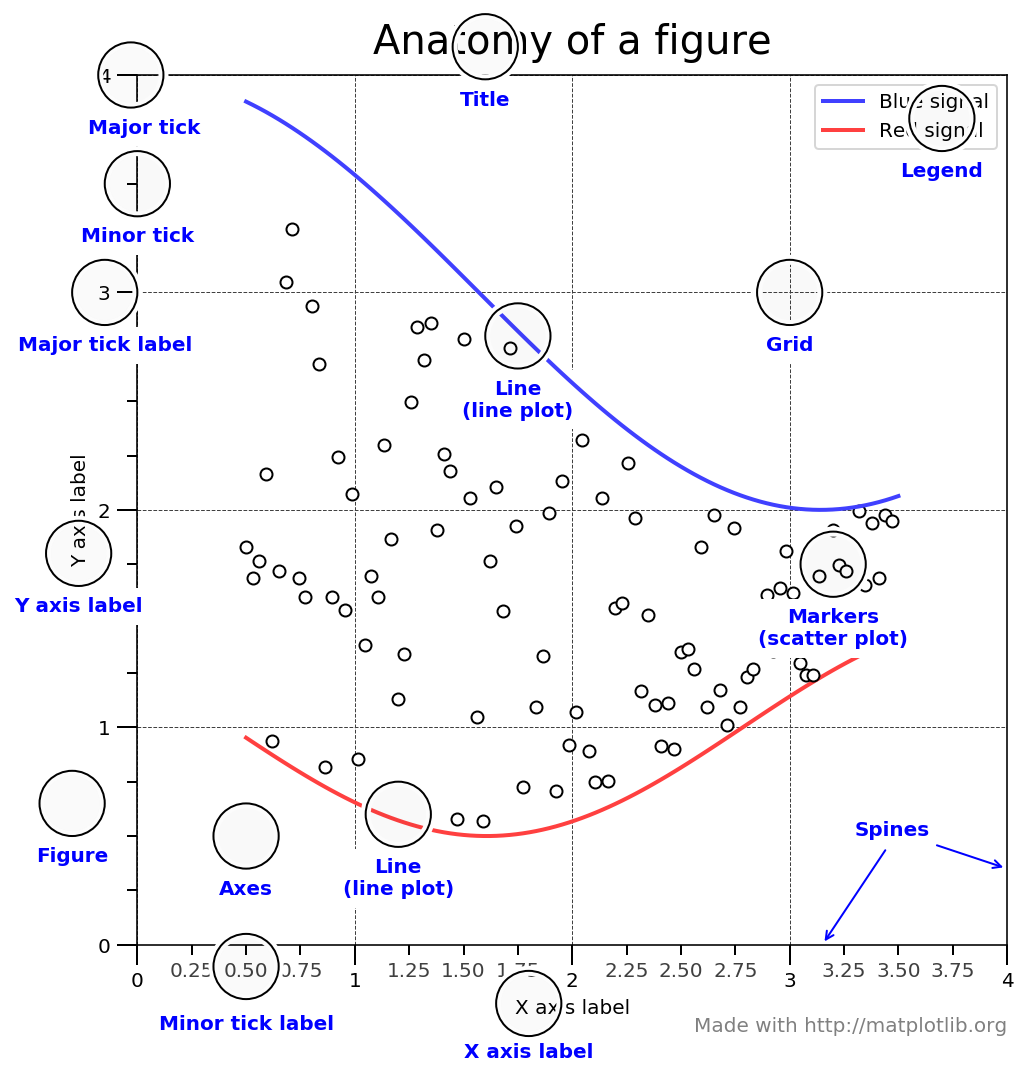

In [4]:
# This figure shows the name of several matplotlib elements composing a figure
# https://matplotlib.org/examples/showcase/anatomy.html
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter


np.random.seed(19680801)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, aspect=1)


def minor_tick(x, pos):
    if not x % 1.0:
        return ""
    return "%.2f" % x

ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter(FuncFormatter(minor_tick))

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which='major', width=1.0)
ax.tick_params(which='major', length=10)
ax.tick_params(which='minor', width=1.0, labelsize=10)
ax.tick_params(which='minor', length=5, labelsize=10, labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax.plot(X, Y1, c=(0.25, 0.25, 1.00), lw=2, label="Blue signal", zorder=10)
ax.plot(X, Y2, c=(1.00, 0.25, 0.25), lw=2, label="Red signal")
ax.plot(X, Y3, linewidth=0,
        marker='o', markerfacecolor='w', markeredgecolor='k')

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("X axis label")
ax.set_ylabel("Y axis label")

ax.legend()


def circle(x, y, radius=0.15):
    from matplotlib.patches import Circle
    from matplotlib.patheffects import withStroke
    circle = Circle((x, y), radius, clip_on=False, zorder=10, linewidth=1,
                    edgecolor='black', facecolor=(0, 0, 0, .0125),
                    path_effects=[withStroke(linewidth=5, foreground='w')])
    ax.add_artist(circle)


def text(x, y, text):
    ax.text(x, y, text, backgroundcolor="white",
            ha='center', va='top', weight='bold', color='blue')


# Minor tick
circle(0.50, -0.10)
text(0.50, -0.32, "Minor tick label")

# Major tick
circle(-0.03, 4.00)
text(0.03, 3.80, "Major tick")

# Minor tick
circle(0.00, 3.50)
text(0.00, 3.30, "Minor tick")

# Major tick label
circle(-0.15, 3.00)
text(-0.15, 2.80, "Major tick label")

# X Label
circle(1.80, -0.27)
text(1.80, -0.45, "X axis label")

# Y Label
circle(-0.27, 1.80)
text(-0.27, 1.6, "Y axis label")

# Title
circle(1.60, 4.13)
text(1.60, 3.93, "Title")

# Blue plot
circle(1.75, 2.80)
text(1.75, 2.60, "Line\n(line plot)")

# Red plot
circle(1.20, 0.60)
text(1.20, 0.40, "Line\n(line plot)")

# Scatter plot
circle(3.20, 1.75)
text(3.20, 1.55, "Markers\n(scatter plot)")

# Grid
circle(3.00, 3.00)
text(3.00, 2.80, "Grid")

# Legend
circle(3.70, 3.80)
text(3.70, 3.60, "Legend")

# Axes
circle(0.5, 0.5)
text(0.5, 0.3, "Axes")

# Figure
circle(-0.3, 0.65)
text(-0.3, 0.45, "Figure")

color = 'blue'
ax.annotate('Spines', xy=(4.0, 0.35), xycoords='data',
            xytext=(3.3, 0.5), textcoords='data',
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.annotate('', xy=(3.15, 0.0), xycoords='data',
            xytext=(3.45, 0.45), textcoords='data',
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.text(4.0, -0.4, "Made with http://matplotlib.org",
        fontsize=10, ha="right", color='.5')

# Resources:

[DataCamp Intro to Visualization](https://campus.datacamp.com/courses/introduction-to-data-visualization-with-python/)

[pythonprogramming.net](https://pythonprogramming.net/matplotlib-intro-tutorial/)

[Seaborn Documentations](http://seaborn.pydata.org/)

[Simple Plotting Tutorials from Matplotlib Documentation](https://matplotlib.org/users/pyplot_tutorial.html)

[Pandas plotting documentation](https://pandas.pydata.org/pandas-docs/stable/visualization.html)
